In [ ]:
import cv2
import numpy as np
import os

def extract_and_filter_red_frames(
    video_path: str,
    output_dir: str,
    frame_skip_interval: int,
    red_pixel_threshold: int,
    filename_prefix: str = "frame"
):
    """
    Trích xuất và lọc các khung hình từ video dựa trên bộ lọc thời gian
    và số lượng pixel màu đỏ.

    Args:
        video_path (str): Đường dẫn đến tệp video đầu vào.
        output_dir (str): Thư mục để lưu các khung hình đã xử lý.
        frame_skip_interval (int): Khoảng thời gian bỏ qua khung hình.
        red_pixel_threshold (int): Ngưỡng số lượng pixel màu đỏ tối thiểu để lưu một khung hình.
        filename_prefix (str): Tiền tố cho tên tệp khung hình đã lưu.
    """

    os.makedirs(output_dir, exist_ok=True)

    print(f"Video input path: {video_path}")
    print(f"Output directory path: {output_dir}")
    print("Output directory ensured to exist.")

    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print(f"Lỗi: Không thể mở tệp video {video_path}")
        return

    frame_id = 0
    saved_frame_count = 0

    print(f"Video capture initialized for: {video_path}")
    print(f"Initial frame_id: {frame_id}")
    print(f"Initial saved_frame_count: {saved_frame_count}")

    while True:
        ret, frame = cap.read()

        if not ret:
            break

        frame_id += 1

        if frame_id % frame_skip_interval == 0:
            hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

            lower_red1 = np.array([0, 100, 100])
            upper_red1 = np.array([10, 255, 255])
            lower_red2 = np.array([160, 100, 100])
            upper_red2 = np.array([180, 255, 255])

            mask1 = cv2.inRange(hsv_frame, lower_red1, upper_red1)
            mask2 = cv2.inRange(hsv_frame, lower_red2, upper_red2)

            red_mask = cv2.addWeighted(mask1, 1.0, mask2, 1.0, 0)

            red_pixel_count = cv2.countNonZero(red_mask)

            if red_pixel_count >= red_pixel_threshold:
                frame_filename = os.path.join(output_dir, f"{filename_prefix}_frame_{frame_id:04d}.jpg")
                cv2.imwrite(frame_filename, frame)
                saved_frame_count += 1

    cap.release()

    print(f"Finished processing video. Total frames processed: {frame_id}")
    print(f"Total frames saved (with >= {red_pixel_threshold} red pixels): {saved_frame_count}")

In [ ]:
skip_frames = 15
red_threshold = 30000

def get_filename_prefix(video_path):
    return os.path.splitext(os.path.basename(video_path))[0]

In [ ]:
# video_file = '/content/drive/MyDrive/BottleDefectDetection/dataset_videos/loi_rach&lapchai.mp4'
# output_folder = '/content/drive/MyDrive/BottleDefectDetection/dataset_image/loi_rach&lapchai'
# filename_prefix = get_filename_prefix(video_file)

# extract_and_filter_red_frames(video_file, output_folder, skip_frames, red_threshold, filename_prefix)

In [ ]:
# video_file = '/content/drive/MyDrive/BottleDefectDetection/dataset_videos/loi_meo_sp.mp4'
# output_folder = '/content/drive/MyDrive/BottleDefectDetection/dataset_image/loi_meo_sp'
# filename_prefix = get_filename_prefix(video_file)

# extract_and_filter_red_frames(video_file, output_folder, skip_frames, red_threshold, filename_prefix)

Video input path: /content/drive/MyDrive/BottleDefectDetection/dataset_videos/loi_meo_sp.mp4
Output directory path: /content/drive/MyDrive/BottleDefectDetection/dataset_image/loi_meo_sp
Output directory ensured to exist.
Video capture initialized for: /content/drive/MyDrive/BottleDefectDetection/dataset_videos/loi_meo_sp.mp4
Initial frame_id: 0
Initial saved_frame_count: 0
Finished processing video. Total frames processed: 15729
Total frames saved (with >= 30000 red pixels): 206


In [ ]:
# video_file = '/content/drive/MyDrive/BottleDefectDetection/dataset_videos/khong_loi.mp4'
# output_folder = '/content/drive/MyDrive/BottleDefectDetection/dataset_image/khong_loi'
# filename_prefix = get_filename_prefix(video_file)

# extract_and_filter_red_frames(video_file, output_folder, skip_frames, red_threshold, filename_prefix)

Đã đọc ảnh từ: /content/drive/MyDrive/BottleDefectDetection/dataset_image/khong_loi/khong_loi_frame_0840.jpg
Số lượng pixel màu đỏ trong ảnh là: 277654
Ảnh gốc:


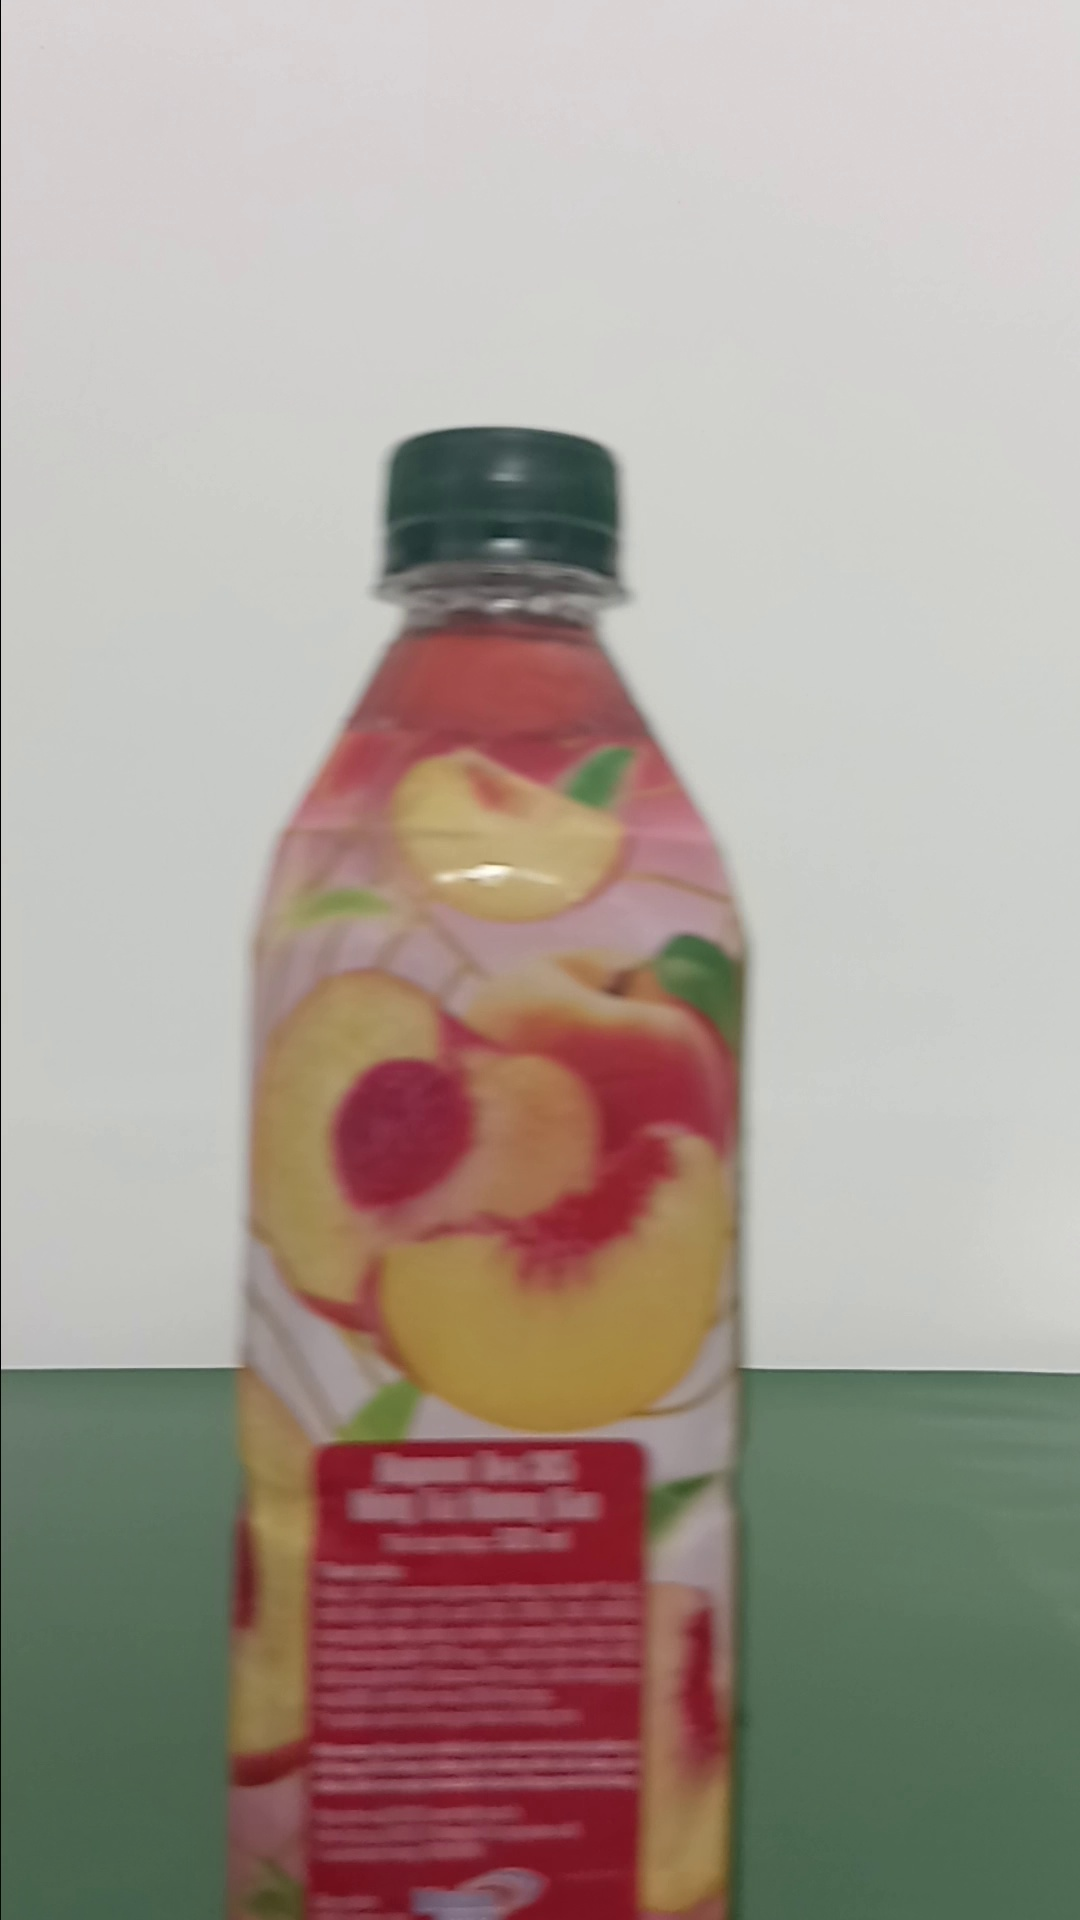

Mặt nạ màu đỏ:


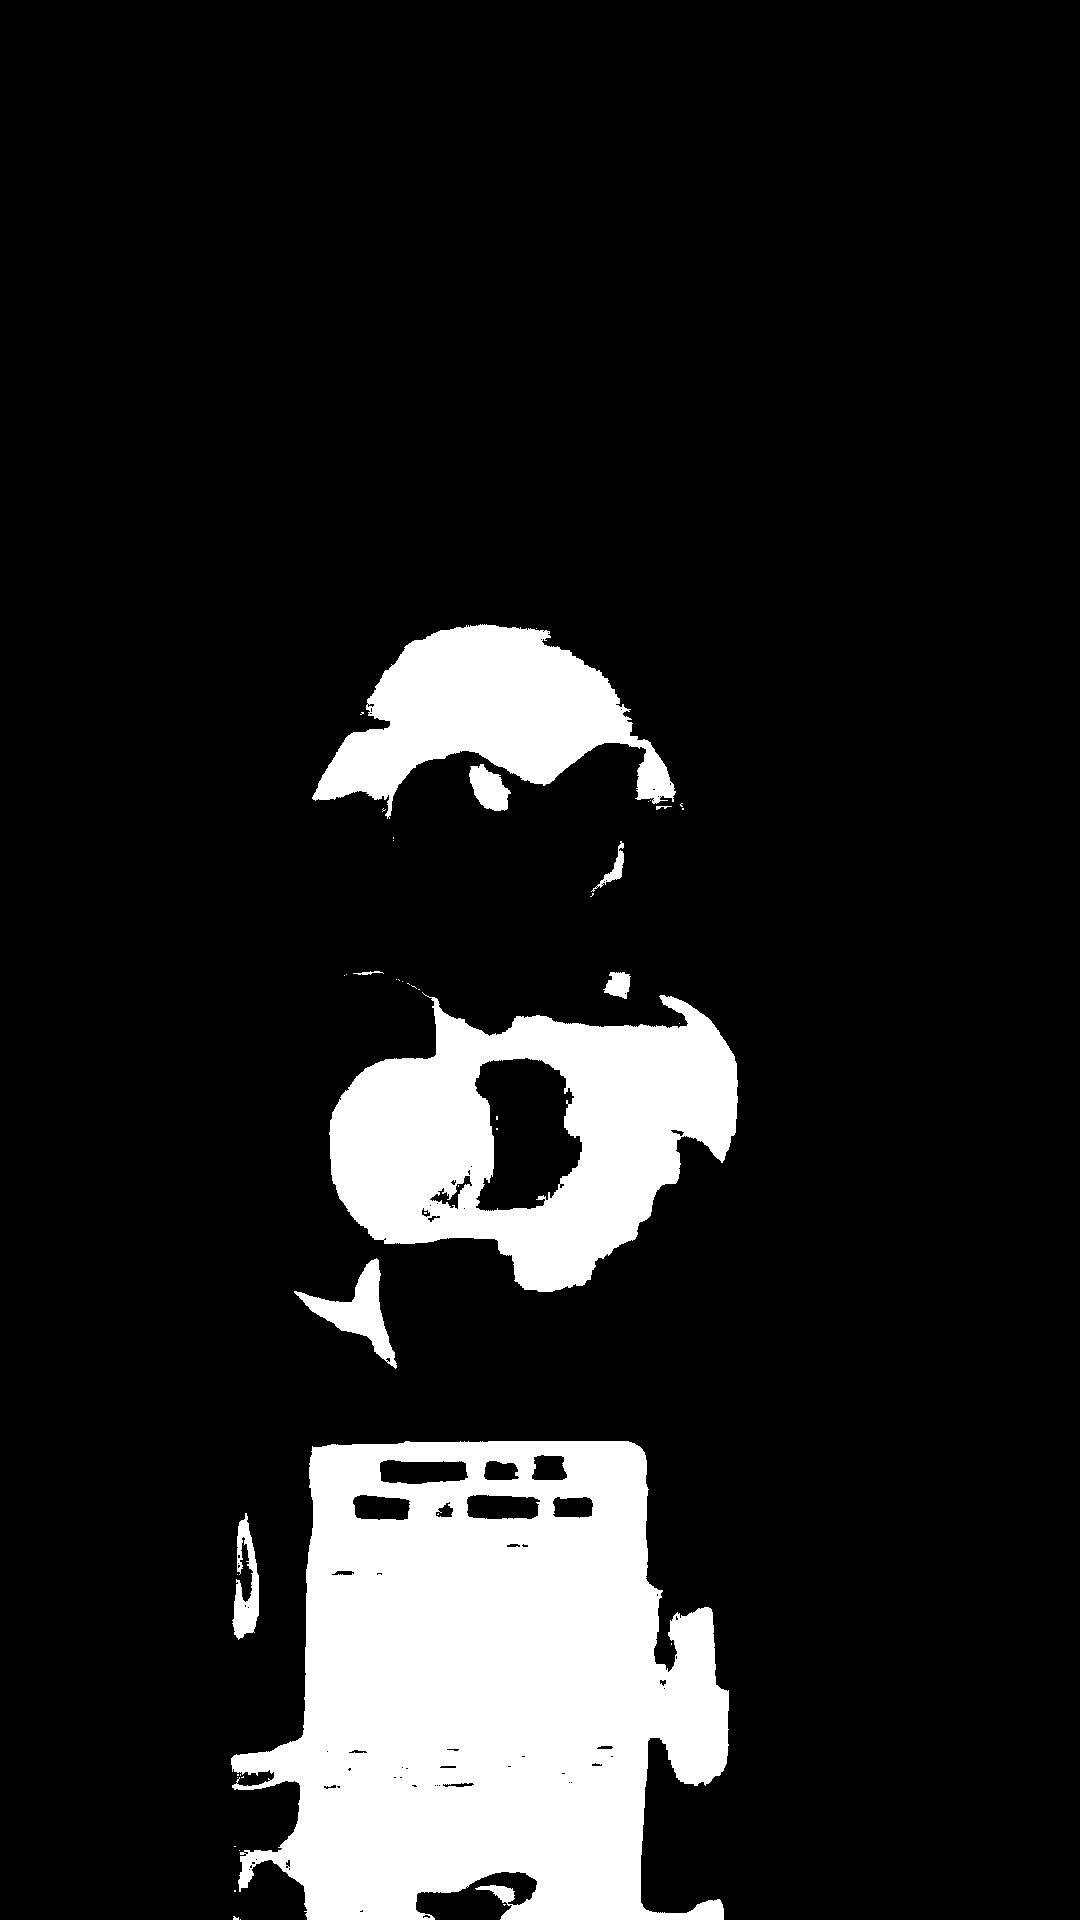

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
image_path = '/content/drive/MyDrive/BottleDefectDetection/dataset_image/khong_loi/khong_loi_frame_0840.jpg'

image = cv2.imread(image_path)

if image is None:
    print(f"Lỗi: Không thể đọc ảnh từ đường dẫn {image_path}")
else:
    print(f"Đã đọc ảnh từ: {image_path}")

    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower_red1 = np.array([0, 100, 100])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([160, 100, 100])
    upper_red2 = np.array([180, 255, 255])

    mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)

    red_mask = cv2.addWeighted(mask1, 1.0, mask2, 1.0, 0)

    red_pixel_count = cv2.countNonZero(red_mask)
    print(f"Số lượng pixel màu đỏ trong ảnh là: {red_pixel_count}")

    print("Ảnh gốc:")
    cv2_imshow(image)

    print("Mặt nạ màu đỏ:")
    cv2_imshow(red_mask)
